In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        continue

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [3]:
train_dir = "../input/emotion-detection-fer/train" #passing the path with training images
test_dir = "../input/emotion-detection-fer/test"   #passing the path with testing images
img_size = 48

In [4]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [6]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )
epochs = 100
batch_size = 64

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,496,903 (17.15 MB)

 Trainable params: 4,492,935 (17.14 MB)

 Non-trainable params: 3,968 (15.50 KB)

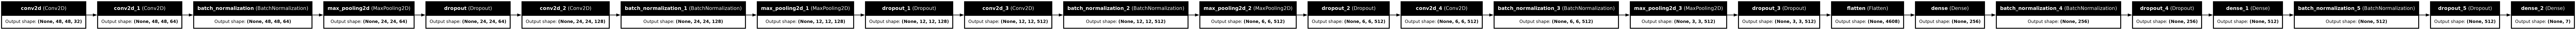

In [9]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='mood.png', show_shapes=True, show_layer_names=True, rankdir='LR',)

In [10]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-04-17 10:01:21.808846: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.16473, expected 0.928603
2024-04-17 10:01:21.808921: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 1.1794, expected 0.943274
2024-04-17 10:01:21.808931: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 0.892153, expected 0.656024
2024-04-17 10:01:21.808939: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 1.163, expected 0.926874
2024-04-17 10:01:21.808949: E external/local_xla/xla/service/gpu/buffer_comparator.cc

  3/359 ━━━━━━━━━━━━━━━━━━━━ 24s 68ms/step - accuracy: 0.0868 - loss: 10.2035   

I0000 00:00:1713348092.646578     926 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


352/359 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.1781 - loss: 9.6303

2024-04-17 10:02:13.282871: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.6176, expected 1.1528
2024-04-17 10:02:13.282937: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 2.31702, expected 1.85223
2024-04-17 10:02:13.282947: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 2.58123, expected 2.11644
2024-04-17 10:02:13.282956: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.73522, expected 2.27042
2024-04-17 10:02:13.282964: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 2.52884, expected 2.06404
2024-04-17 10:02:13.282974: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.80052, expected 2.33572
2024-04-17 10:02:13.282982: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 2.45587, expected 1.99107
2024-04-17 10:02:13.282990: E external/local_xla/xla/serv

359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.1785 - loss: 9.6238

2024-04-17 10:02:27.447002: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 0.913074, expected 0.698697
2024-04-17 10:02:27.447065: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 0.916716, expected 0.702339
2024-04-17 10:02:27.447076: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 0.801774, expected 0.587396
2024-04-17 10:02:27.447084: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32: 0.982335, expected 0.767958
2024-04-17 10:02:27.447093: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 191: 0.839342, expected 0.624965
2024-04-17 10:02:27.447105: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 720: 1.0785, expected 0.864118
2024-04-17 10:02:27.447114: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 845: 1.02572, expected 0.811343
2024-04-17 10:02:27.447122: E exte

359/359 ━━━━━━━━━━━━━━━━━━━━ 78s 157ms/step - accuracy: 0.1785 - loss: 9.6228 - val_accuracy: 0.1718 - val_loss: 8.6302
Epoch 2/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 33s 90ms/step - accuracy: 0.2315 - loss: 8.4739 - val_accuracy: 0.2856 - val_loss: 7.5980
Epoch 3/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.2545 - loss: 7.4804 - val_accuracy: 0.3142 - val_loss: 6.5400
Epoch 4/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 34s 92ms/step - accuracy: 0.2881 - loss: 6.4994 - val_accuracy: 0.3394 - val_loss: 5.7332
Epoch 5/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 33s 91ms/step - accuracy: 0.3116 - loss: 5.5916 - val_accuracy: 0.3925 - val_loss: 4.8458
Epoch 6/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.3385 - loss: 4.8280 - val_accuracy: 0.4434 - val_loss: 4.1292
Epoch 7/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.3723 - loss: 4.1720 - val_accuracy: 0.4378 - val_loss: 3.8195
Epoch 8/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.3968 - loss: 3.6342 - val

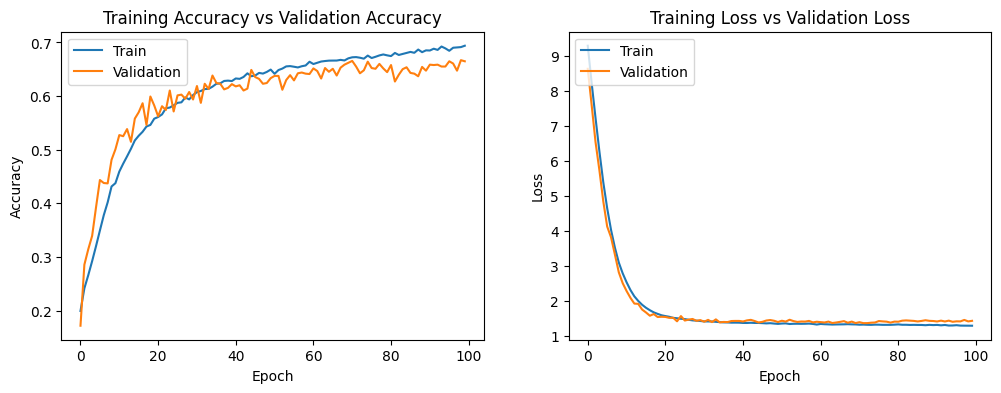

In [11]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [12]:
model.save_weights('mood.weights.h5')

In [13]:
evaluation = model.evaluate(validation_generator)
print(f"\nTest Accuracy: {evaluation[1] * 100:.2f}%")

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6630 - loss: 1.4345

Test Accuracy: 66.48%


In [14]:
y_pred = np.argmax(model.predict(validation_generator), axis=1)
y_true = validation_generator.classes

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
class_labels = list(validation_generator.class_indices.keys())
print("\nClassification Report:\n", classification_report(validation_generator.classes, y_pred, target_names=class_labels))


Classification Report:
               precision    recall  f1-score   support

       angry       0.11      0.12      0.11       191
   disgusted       0.00      0.00      0.00        22
     fearful       0.16      0.08      0.11       204
       happy       0.25      0.25      0.25       354
     neutral       0.16      0.20      0.18       246
         sad       0.21      0.21      0.21       249
   surprised       0.13      0.16      0.14       166

    accuracy                           0.18      1432
   macro avg       0.15      0.15      0.14      1432
weighted avg       0.18      0.18      0.18      1432



In [16]:
model.save("mood.h5")

(48, 48)


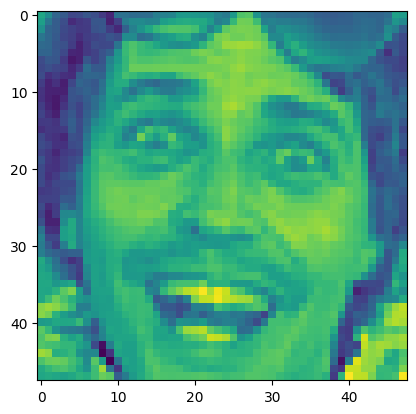

In [17]:
img = image.load_img("../input/emotion-detection-fer/test/happy/im1021.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

In [18]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [19]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]


In [20]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Happy


In [21]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

359/359 ━━━━━━━━━━━━━━━━━━━━ 31s 87ms/step - accuracy: 0.7378 - loss: 1.1730
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6599 - loss: 1.4471
final train accuracy = 73.95 , validation accuracy = 66.48


In [7]:
import keras.backend as K
K.clear_session()
del model